# UM Carpentries Workshop - Python
## Day 2: Python for Data Analysis
### 2024-03-22

In [1]:
import pandas as pd
import numpy as np

gapminder = pd.read_csv("data/gapminder_data.csv")

In [56]:
gapminder

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [2]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [3]:
gapminder.head(3)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710


In [4]:
gapminder.tail(3)

,country,year,pop,continent,lifeExp,gdpPercap
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143.0,Africa,43.487,469.709298


In [5]:
gapminder.tail()

,country,year,pop,continent,lifeExp,gdpPercap
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143.0,Africa,43.487,469.709298


In [6]:
gapminder.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [7]:
# Average life expectancy
(
    gapminder
    .agg({'lifeExp' : 'mean'})
)

lifeExp    59.474439
dtype: float64

In [8]:
# Highest year value
gapminder.max()['year']

2007

In [9]:
# Collect rows with a specific year using the query function
(
    gapminder
    .query('year == 2007')
)

,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356.0,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798
1679,Yemen Rep.,2007,22211743.0,Asia,62.698,2280.769906
1691,Zambia,2007,11746035.0,Africa,42.384,1271.211593


In [10]:
# Question: can you round the mean lifeExp values?
# Ans: Yes, you can chain the round() method at the bottom

(
    gapminder
    .query('year == 2007')
    .agg({'lifeExp' : 'mean'})
    .round(decimals=2)

)

lifeExp    67.01
dtype: float64

In [11]:
year_min = gapminder['year'].min()
print(year_min)

1952


In [12]:
# What was the average GDP per cap at the earliest year?
# This one uses '@' to refer to the stored variable
# Is the '@' needed?  If so, why?
(
    gapminder
    .query('year == @year_min')
    .agg({'gdpPercap' : 'mean'})
)

gdpPercap    3725.276046
dtype: float64

In [13]:
# This version uses the method 'min()' to get the lowest year
(
    gapminder
    .query('year == year.min()')
    .agg({'gdpPercap' : 'mean'})
)

gdpPercap    3725.276046
dtype: float64

In [14]:
# This code gets you a summary of the average and Std Dev
(
    gapminder
    .query('year == year.min()')
    .agg({'gdpPercap' : ['mean', 'var']})
)

,gdpPercap
mean,3.725276e+03
var,8.688225e+07


In [15]:
# Extract all rows that have "United States" in the "Country" column
(
    gapminder
    .query('country == "United States"')
)
# Note, if the column name has spaces in it, we need to wrap the column name
# with backticks " for it to work

,country,year,pop,continent,lifeExp,gdpPercap
1608,United States,1952,157553000.0,Americas,68.440,13990.48208
1609,United States,1957,171984000.0,Americas,69.490,14847.12712
1610,United States,1962,186538000.0,Americas,70.210,16173.14586
1611,United States,1967,198712000.0,Americas,70.760,19530.36557
1612,United States,1972,209896000.0,Americas,71.340,21806.03594
1613,United States,1977,220239000.0,Americas,73.380,24072.63213
1614,United States,1982,232187835.0,Americas,74.650,25009.55914
1615,United States,1987,242803533.0,Americas,75.020,29884.35041
1616,United States,1992,256894189.0,Americas,76.090,32003.93224
1617,United States,1997,272911760.0,Americas,76.810,35767.43303


In [16]:
# Rows with US as the country and year greater than, not including 2000
# This version combines the query arguments with 'and' reserve word


(
    gapminder
    .query('country == "United States" and year > 2000')
)

,country,year,pop,continent,lifeExp,gdpPercap
1618,United States,2002,287675526.0,Americas,77.310,39097.09955
1619,United States,2007,301139947.0,Americas,78.242,42951.65309


In [17]:
# This version uses two separate query functions
(
    gapminder
    .query('country == "United States"')
    .query('year > 2000')
)

,country,year,pop,continent,lifeExp,gdpPercap
1618,United States,2002,287675526.0,Americas,77.310,39097.09955
1619,United States,2007,301139947.0,Americas,78.242,42951.65309


In [18]:
(
    gapminder
    .query("country in ['United States', 'Canada']")
)
# Note that the outer quotes are double("") which requires inner ones to be
# single quotes ('')

,country,year,pop,continent,lifeExp,gdpPercap
240,Canada,1952,14785584.0,Americas,68.750,11367.16112
241,Canada,1957,17010154.0,Americas,69.960,12489.95006
242,Canada,1962,18985849.0,Americas,71.300,13462.48555
243,Canada,1967,20819767.0,Americas,72.130,16076.58803
244,Canada,1972,22284500.0,Americas,72.880,18970.57086
245,Canada,1977,23796400.0,Americas,74.210,22090.88306
246,Canada,1982,25201900.0,Americas,75.760,22898.79214
247,Canada,1987,26549700.0,Americas,76.860,26626.51503
248,Canada,1992,28523502.0,Americas,77.950,26342.88426
249,Canada,1997,30305843.0,Americas,78.610,28954.92589


In [19]:
country_list = ['United States', 'Canada']

(
    gapminder
    .query("country not in @country_list")
    .query("year == 2007")
    .query("continent == 'Americas'")
)
# In this exercise, we are filtering out rows with Americas as the continent
# but only the data for 2007 and countries other than the US and Canada

,country,year,pop,continent,lifeExp,gdpPercap
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
143,Bolivia,2007,9119152.0,Americas,65.554,3822.137084
179,Brazil,2007,190010647.0,Americas,72.390,9065.800825
287,Chile,2007,16284741.0,Americas,78.553,13171.638850
311,Colombia,2007,44227550.0,Americas,72.889,7006.580419
359,Costa Rica,2007,4133884.0,Americas,78.782,9645.061420
395,Cuba,2007,11416987.0,Americas,78.273,8948.102923
443,Dominican Republic,2007,9319622.0,Americas,72.235,6025.374752
455,Ecuador,2007,13755680.0,Americas,74.994,6873.262326
479,El Salvador,2007,6939688.0,Americas,71.878,5728.353514


In [20]:
(
    gapminder
    .groupby('year')
    .indices
)


{1952: array([   0,   12,   24,   36,   48,   60,   72,   84,   96,  108,  120,
         132,  144,  156,  168,  180,  192,  204,  216,  228,  240,  252,
         264,  276,  288,  300,  312,  324,  336,  348,  360,  372,  384,
         396,  408,  420,  432,  444,  456,  468,  480,  492,  504,  516,
         528,  540,  552,  564,  576,  588,  600,  612,  624,  636,  648,
         660,  672,  684,  696,  708,  720,  732,  744,  756,  768,  780,
         792,  804,  816,  828,  840,  852,  864,  876,  888,  900,  912,
         924,  936,  948,  960,  972,  984,  996, 1008, 1020, 1032, 1044,
        1056, 1068, 1080, 1092, 1104, 1116, 1128, 1140, 1152, 1164, 1176,
        1188, 1200, 1212, 1224, 1236, 1248, 1260, 1272, 1284, 1296, 1308,
        1320, 1332, 1344, 1356, 1368, 1380, 1392, 1404, 1416, 1428, 1440,
        1452, 1464, 1476, 1488, 1500, 1512, 1524, 1536, 1548, 1560, 1572,
        1584, 1596, 1608, 1620, 1632, 1644, 1656, 1668, 1680, 1692],
       dtype=int64),
 1957: array([  

In [21]:
# We can verify the indices output by checking
(
    gapminder
    .query('year == 1952')
)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
12,Albania,1952,1282697.0,Europe,55.230,1601.056136
24,Algeria,1952,9279525.0,Africa,43.077,2449.008185
36,Angola,1952,4232095.0,Africa,30.015,3520.610273
48,Argentina,1952,17876956.0,Americas,62.485,5911.315053
...,...,...,...,...,...,...
1644,Vietnam,1952,26246839.0,Asia,40.412,605.066492
1656,West Bank and Gaza,1952,1030585.0,Asia,43.160,1515.592329
1668,Yemen Rep.,1952,4963829.0,Asia,32.548,781.717576
1680,Zambia,1952,2672000.0,Africa,42.038,1147.388831


In [22]:
(
    gapminder
    .groupby('year')
    .agg({'lifeExp' : 'mean'})
)
# Average of the column life expectancy by year

,lifeExp
year,
1952,49.057620
1957,51.507401
1962,53.609249
1967,55.678290
1972,57.647386
1977,59.570157
1982,61.533197
1987,63.212613
1992,64.160338


In [23]:
# Exercise
(
    gapminder
    .groupby('continent')
    .agg({'lifeExp' : ['mean', 'min']})
)

lifeExp        
                mean     min
continent                   
Africa     48.865330  23.599
Americas   64.658737  37.579
Asia       60.064903  28.801
Europe     71.903686  43.585
Oceania    74.326208  69.120

In [24]:
# Question: why doesn't it work when there are two agg methods
# one after another?
# Ans: The data object is progressively reduced as the chain goes.
# The original data are lost after the first agg, so the second agg will not work

In [25]:
(
    gapminder
    .query('year == 2007')
    .groupby('continent')
    .agg({'lifeExp' : 'mean'})
    .sort_values('lifeExp', ascending=False)
)
# 'Ascending=False' gives you a descending list
# 'Ascending=True' gives you an ascending list

,lifeExp
continent,
Oceania,80.719500
Europe,77.648600
Americas,73.608120
Asia,70.728485
Africa,54.806038


In [26]:
# make new variables with assign()
gapminder['gdpPercap']*gapminder['pop']

0       6.567086e+09
1       7.585449e+09
2       8.758856e+09
3       9.648014e+09
4       9.678553e+09
            ...     
1699    6.508241e+09
1700    7.422612e+09
1701    9.037851e+09
1702    8.015111e+09
1703    5.782658e+09
Length: 1704, dtype: float64

In [27]:
# lambda functions
(
    gapminder
    .assign(gdp=lambda df: df['gdpPercap']*df['pop'])
)
# The 'assign' function adds a column 'gdp' to the data frame

,country,year,pop,continent,lifeExp,gdpPercap,gdp
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.567086e+09
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,7.585449e+09
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,8.758856e+09
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,9.648014e+09
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,9.678553e+09
...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,6.508241e+09
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,7.422612e+09
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,9.037851e+09
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,8.015111e+09


In [28]:
# Question: why don't we need to put quotes to the new column name in this case?
# Ans: in this case the new column name is essentially the keyword argument
# inside the method call.  And if you recall how to specify the arguments
# inside a function or method, we don't put quotes around them.

(
    gapminder
    .assign(gdp=lambda df: df['gdpPercap']*df['pop'],
           popInMillion=lambda df:df['pop']/1_000_000)
)

,country,year,pop,continent,lifeExp,gdpPercap,gdp,popInMillion
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.567086e+09,8.425333
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,7.585449e+09,9.240934
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,8.758856e+09,10.267083
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,9.648014e+09,11.537966
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,9.678553e+09,13.079460
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,6.508241e+09,9.216418
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,7.422612e+09,10.704340
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,9.037851e+09,11.404948
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,8.015111e+09,11.926563


In [29]:
#Subset columns: call 'pop' column on its own

gapminder['pop']

0        8425333.0
1        9240934.0
2       10267083.0
3       11537966.0
4       13079460.0
           ...    
1699     9216418.0
1700    10704340.0
1701    11404948.0
1702    11926563.0
1703    12311143.0
Name: pop, Length: 1704, dtype: float64

In [30]:
# Note the double bracket used here, but it does not lend itself to chain different methods
# We can use filter instead
gapminder[['pop', 'year']]

,pop,year
0,8425333.0,1952
1,9240934.0,1957
2,10267083.0,1962
3,11537966.0,1967
4,13079460.0,1972
...,...,...
1699,9216418.0,1987
1700,10704340.0,1992
1701,11404948.0,1997
1702,11926563.0,2002


In [31]:
(
    gapminder
    .filter(['pop', 'year'])
)
# Filter subsets columns

,pop,year
0,8425333.0,1952
1,9240934.0,1957
2,10267083.0,1962
3,11537966.0,1967
4,13079460.0,1972
...,...,...
1699,9216418.0,1987
1700,10704340.0,1992
1701,11404948.0,1997
1702,11926563.0,2002


In [32]:
(
    gapminder
    .drop(columns=['pop', 'year'])
)
# Drop removes the pop and year columns

,country,continent,lifeExp,gdpPercap
0,Afghanistan,Asia,28.801,779.445314
1,Afghanistan,Asia,30.332,820.853030
2,Afghanistan,Asia,31.997,853.100710
3,Afghanistan,Asia,34.020,836.197138
4,Afghanistan,Asia,36.088,739.981106
...,...,...,...,...
1699,Zimbabwe,Africa,62.351,706.157306
1700,Zimbabwe,Africa,60.377,693.420786
1701,Zimbabwe,Africa,46.809,792.449960
1702,Zimbabwe,Africa,39.989,672.038623


In [33]:
# Changing the shape of data, this is something that is commonly done.
# Usually need to get rid of some columns before doing the data transformation
(
    gapminder
    .filter(['continent', 'country', 'lifeExp', 'year']) #extract columns of interest
    .pivot(columns='year',
           values='lifeExp',
           index=['continent', 'country'])
)
#This results in a table with a wider format

year                        1952    1957    1962    1967    1972    1977  \
continent country                                                          
Africa    Algeria         43.077  45.685  48.303  51.407  54.518  58.014   
          Angola          30.015  31.999  34.000  35.985  37.928  39.483   
          Benin           38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana        47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso    31.975  34.906  37.814  40.697  43.591  46.137   
...                          ...     ...     ...     ...     ...     ...   
Europe    Switzerland     69.620  70.560  71.320  72.770  73.780  75.390   
          Turkey          43.585  48.079  52.098  54.336  57.005  59.507   
          United Kingdom  69.180  70.420  70.760  71.360  72.010  72.760   
Oceania   Australia       69.120  70.330  70.930  71.100  71.930  73.490   
          New Zealand     69.390  70.260  71.240  71.520  71.890  72.220   

year                        1982    1987    1992    1997    2002    2007  
continent country                                                         
Africa    Algeria         61.368  65.799  67.744  69.152  70.994  72.301  
          Angola          39.942  39.906  40.647  40.963  41.003  42.731  
          Benin           50.904  52.337  53.919  54.777  54.406  56.728  
          Botswana        61.484  63.622  62.745  52.556  46.634  50.728  
          Burkina Faso    48.122  49.557  50.260  50.324  50.650  52.295  
...                          ...     ...     ...     ...     ...     ...  
Europe    Switzerland     76.210  77.410  78.030  79.370  80.620  81.701  
          Turkey          61.036  63.108  66.146  68.835  70.845  71.777  
          United Kingdom  74.040  75.007  76.420  77.218  78.471  79.425  
Oceania   Australia       74.740  76.320  77.560  78.830  80.370  81.235  
          New Zealand     73.840  74.320  76.330  77.550  79.110  80.204  

[142 rows x 12 columns]

In [34]:
(
    gapminder
    .filter(['continent', 'country', 'lifeExp', 'year']) #extract columns of interest
    .pivot(columns='year',
           values='lifeExp',
           index=['continent', 'country'])
    .reset_index()
    .melt(id_vars=['continent', 'country'],
          value_name = 'lifeExp')
)
#How did Pandas know to organize the year column without it explicitly being called out?

,continent,country,year,lifeExp
0,Africa,Algeria,1952,43.077
1,Africa,Angola,1952,30.015
2,Africa,Benin,1952,38.223
3,Africa,Botswana,1952,47.622
4,Africa,Burkina Faso,1952,31.975
...,...,...,...,...
1699,Europe,Switzerland,2007,81.701
1700,Europe,Turkey,2007,71.777
1701,Europe,United Kingdom,2007,79.425
1702,Oceania,Australia,2007,81.235


In [35]:
# Exercise: Recreating the Americas 2007 gapminder dataset
# Filter to the year 2007
# Keep the continent 'Americas'
# Drop the year and continent
# Store the new DataFrame into a variable gapminder_2007

gapminder_2007 = (
    gapminder
    .query('year == year.max() and continent == "Americas"')
    .drop(columns=['year', 'continent'])
)
gapminder_2007 #Print not used to avoid converting data into text, since Pandas provides tabulated data

,country,pop,lifeExp,gdpPercap
59,Argentina,40301927.0,75.320,12779.379640
143,Bolivia,9119152.0,65.554,3822.137084
179,Brazil,190010647.0,72.390,9065.800825
251,Canada,33390141.0,80.653,36319.235010
287,Chile,16284741.0,78.553,13171.638850
311,Colombia,44227550.0,72.889,7006.580419
359,Costa Rica,4133884.0,78.782,9645.061420
395,Cuba,11416987.0,78.273,8948.102923
443,Dominican Republic,9319622.0,72.235,6025.374752
455,Ecuador,13755680.0,74.994,6873.262326


In [36]:
# Cleaning up data
pd.read_csv("data/co2-un-data.csv", skiprows=1) 

# Read co2-un-data.csv file from the folder 'data'
# In the original file, the headers were not correct and were in the first row of the file
# the 'skiprows' function allows you to skip the first row by skipping one row,
# instead of calling out the row by its index
# In other words, we are telling it to skip one row and not skip row #1, as in the index

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4338.334,NaN,"International Energy Agency, IEA World Energy ..."
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,6929.926,NaN,"International Energy Agency, IEA World Energy ..."
2,8,Albania,1995,Emissions (thousand metric tons of carbon diox...,1848.549,NaN,"International Energy Agency, IEA World Energy ..."
3,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3825.184,NaN,"International Energy Agency, IEA World Energy ..."
4,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,3930.295,NaN,"International Energy Agency, IEA World Energy ..."
...,...,...,...,...,...,...,...
2127,716,Zimbabwe,2005,Emissions per capita (metric tons of carbon di...,0.794,NaN,"International Energy Agency, IEA World Energy ..."
2128,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.672,NaN,"International Energy Agency, IEA World Energy ..."
2129,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.749,NaN,"International Energy Agency, IEA World Energy ..."
2130,716,Zimbabwe,2016,Emissions per capita (metric tons of carbon di...,0.642,NaN,"International Energy Agency, IEA World Energy ..."


In [37]:
# Cleaning up data
co2_emissions_dirty = (
    pd.read_csv("data/co2-un-data.csv", skiprows=2,
           names=['region', 'country', 'year', 'series', 
                  'value', 'footnotes', 'source']) 
)

co2_emissions_dirty
# In this case, we told Pandas to skip the first two rows to it skips the unamed column headers
# as well as the poorly named ones and instead we provided our own names for each column

,region,country,year,series,value,footnotes,source
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4338.334,NaN,"International Energy Agency, IEA World Energy ..."
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,6929.926,NaN,"International Energy Agency, IEA World Energy ..."
2,8,Albania,1995,Emissions (thousand metric tons of carbon diox...,1848.549,NaN,"International Energy Agency, IEA World Energy ..."
3,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3825.184,NaN,"International Energy Agency, IEA World Energy ..."
4,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,3930.295,NaN,"International Energy Agency, IEA World Energy ..."
...,...,...,...,...,...,...,...
2127,716,Zimbabwe,2005,Emissions per capita (metric tons of carbon di...,0.794,NaN,"International Energy Agency, IEA World Energy ..."
2128,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.672,NaN,"International Energy Agency, IEA World Energy ..."
2129,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.749,NaN,"International Energy Agency, IEA World Energy ..."
2130,716,Zimbabwe,2016,Emissions per capita (metric tons of carbon di...,0.642,NaN,"International Energy Agency, IEA World Energy ..."


In [38]:
co2_emissions_dirty['series'].unique()
# We would like to shorten the 'series' column

array(['Emissions (thousand metric tons of carbon dioxide)',
       'Emissions per capita (metric tons of carbon dioxide)'],
      dtype=object)

In [39]:
(
    co2_emissions_dirty
    .filter(['country', 'year', 'series', 'value'])
    .replace({
        'series' : {
            'Emissions (thousand metric tons of carbon dioxide)' : 'emissions_total',
            'Emissions per capita (metric tons of carbon dioxide)' : 'emissions_percap'
        }
    })             
)

#replace takes a dictionary of values, just like aggregate
# Note that here 'series' is a dictionary which includes a dictionary

,country,year,series,value
0,Albania,1975,emissions_total,4338.334
1,Albania,1985,emissions_total,6929.926
2,Albania,1995,emissions_total,1848.549
3,Albania,2005,emissions_total,3825.184
4,Albania,2010,emissions_total,3930.295
...,...,...,...,...
2127,Zimbabwe,2005,emissions_percap,0.794
2128,Zimbabwe,2010,emissions_percap,0.672
2129,Zimbabwe,2015,emissions_percap,0.749
2130,Zimbabwe,2016,emissions_percap,0.642


In [40]:
co2_emissions = (
    co2_emissions_dirty
    .filter(['country', 'year', 'series', 'value'])
    .replace({
        'series' : {
            'Emissions (thousand metric tons of carbon dioxide)' : 'emissions_total',
            'Emissions per capita (metric tons of carbon dioxide)' : 'emissions_percap'
        }
    })
    .pivot(index=['country', 'year'],
           columns='series',
           values='value')
    .reset_index()
    # .value_counts(['year'])
    # .sort_index()
    .query('year == 2005')
    .drop(columns='year')
    
)

co2_emissions
# The goal is to combine the co2 data spreadsheet with the UN data spreadsheet
# to do so, we need to make it compatible with each other

series,country,emissions_percap,emissions_total
3,Albania,1.270,3825.184
11,Algeria,2.327,77474.130
19,Angola,0.314,6146.691
27,Argentina,3.819,149476.040
33,Armenia,1.385,4129.845
...,...,...,...
1029,Venezuela (Boliv. Rep. of),5.141,137701.548
1037,Viet Nam,0.940,79230.185
1045,Yemen,0.915,18836.222
1053,Zambia,0.176,2120.692


In [41]:
# Joining data frames

gapminder_2007.reset_index()

,index,country,pop,lifeExp,gdpPercap
0,59,Argentina,40301927.0,75.320,12779.379640
1,143,Bolivia,9119152.0,65.554,3822.137084
2,179,Brazil,190010647.0,72.390,9065.800825
3,251,Canada,33390141.0,80.653,36319.235010
4,287,Chile,16284741.0,78.553,13171.638850
5,311,Colombia,44227550.0,72.889,7006.580419
6,359,Costa Rica,4133884.0,78.782,9645.061420
7,395,Cuba,11416987.0,78.273,8948.102923
8,443,Dominican Republic,9319622.0,72.235,6025.374752
9,455,Ecuador,13755680.0,74.994,6873.262326


In [42]:
(
    gapminder_2007
    .merge(co2_emissions, how='inner', on='country')
)
# When the UN data (gapminder_2007) with the CO2 emissions, however, there are 4 countries missing

,country,pop,lifeExp,gdpPercap,emissions_percap,emissions_total
0,Argentina,40301927.0,75.320,12779.379640,3.819,149476.040
1,Brazil,190010647.0,72.390,9065.800825,1.667,311623.799
2,Canada,33390141.0,80.653,36319.235010,16.762,540431.495
3,Chile,16284741.0,78.553,13171.638850,3.343,54434.634
4,Colombia,44227550.0,72.889,7006.580419,1.238,53585.300
5,Costa Rica,4133884.0,78.782,9645.061420,1.286,5463.059
6,Cuba,11416987.0,78.273,8948.102923,2.220,25051.431
7,Dominican Republic,9319622.0,72.235,6025.374752,1.897,17522.139
8,Ecuador,13755680.0,74.994,6873.262326,1.742,23926.725
9,El Salvador,6939688.0,71.878,5728.353514,1.037,6252.815


In [43]:
(
    gapminder_2007
    .merge(co2_emissions, how='outer', on='country', indicator=True)
    .query("_merge == 'left_only'")
)

# This shows which countries are missing

,country,pop,lifeExp,gdpPercap,emissions_percap,emissions_total,_merge
1,Bolivia,9119152.0,65.554,3822.137084,NaN,NaN,left_only
20,Puerto Rico,3942491.0,78.746,19328.709010,NaN,NaN,left_only
22,United States,301139947.0,78.242,42951.653090,NaN,NaN,left_only
24,Venezuela,26084662.0,73.747,11415.805690,NaN,NaN,left_only


In [44]:
(
    co2_emissions
    .query("country.str.contains('Bolivia|Puerto Rico|United States|Venezuela')")
)

# This shows the string contain any of the strings on the country column in the co2_emissions data
# The merge did not include them because the co2_emissions data have official names
# instead of the shorthand naming

series,country,emissions_percap,emissions_total
101,Bolivia (Plurin. State of),0.984,8975.809
1007,United States of America,19.268,5703220.175
1029,Venezuela (Boliv. Rep. of),5.141,137701.548


In [45]:
co2_fixed = (
    co2_emissions
    .replace({
        'country' : {
            'Bolivia (Plurin. State of)' : 'Bolivia',
            'United States of America' : 'United States',
            'Venezuela (Boliv. Rep. of)' : 'Venezuela'
        }
    })
)

In [46]:
(
    gapminder_2007
    .merge(
        co2_emissions
        .replace({
            'country' : {
                'Bolivia (Plurin. State of)' : 'Bolivia',
                'United States of America' : 'United States',
                'Venezuela (Boliv. Rep. of)' : 'Venezuela'
        }
    }),
    how='outer', on='country', indicator=True
)
    .query('_merge == "left_only"')
)

# Checking which country gets left out of the list

,country,pop,lifeExp,gdpPercap,emissions_percap,emissions_total,_merge
20,Puerto Rico,3942491.0,78.746,19328.70901,NaN,NaN,left_only


In [47]:
# We want to combine Puerto Rico and United States in gapminder_2007.
# But this is a little tricky

gapminder_fixed = (
    gapminder_2007
    .replace({'country' : {'Puerto Rico' : 'United States'}})
    .groupby('country')
    .apply(
        lambda df:
        pd.Series({
            'pop' : np.sum(df['pop']),
            'gdpPercap' : np.sum(df['gdpPercap'] * df['pop']) / np.sum(df['pop']),
            'lifeExp' : np.sum(df['lifeExp'] * df['pop']) / np.sum(df['pop']),
            
        })
    )
)

#Replace uses a dictionary with country as key and value as a dictionary where Puerto Rico is replaced by US
# pd.Series adds columns

In [48]:
gapminder_co2 = (
    # Fixed gapminder_2007 with US and PR combined
   gapminder_fixed
    .merge(co2_fixed, how='inner', on='country')
)
gapminder_co2

,country,pop,gdpPercap,lifeExp,emissions_percap,emissions_total
0,Argentina,40301927.0,12779.379640,75.320000,3.819,149476.040
1,Bolivia,9119152.0,3822.137084,65.554000,0.984,8975.809
2,Brazil,190010647.0,9065.800825,72.390000,1.667,311623.799
3,Canada,33390141.0,36319.235010,80.653000,16.762,540431.495
4,Chile,16284741.0,13171.638850,78.553000,3.343,54434.634
5,Colombia,44227550.0,7006.580419,72.889000,1.238,53585.300
6,Costa Rica,4133884.0,9645.061420,78.782000,1.286,5463.059
7,Cuba,11416987.0,8948.102923,78.273000,2.220,25051.431
8,Dominican Republic,9319622.0,6025.374752,72.235000,1.897,17522.139
9,Ecuador,13755680.0,6873.262326,74.994000,1.742,23926.725


In [49]:
(
    gapminder_co2
    .assign(region=lambda df: np.where(
        df['country'].isin(['Canada', 'United States', 'Mexico']),
        #If true.
        'north',
        # If false
        'south'
    ))
    .to_csv('data/gapminder_co2.csv')
)

In [50]:
# Analyzing combined data

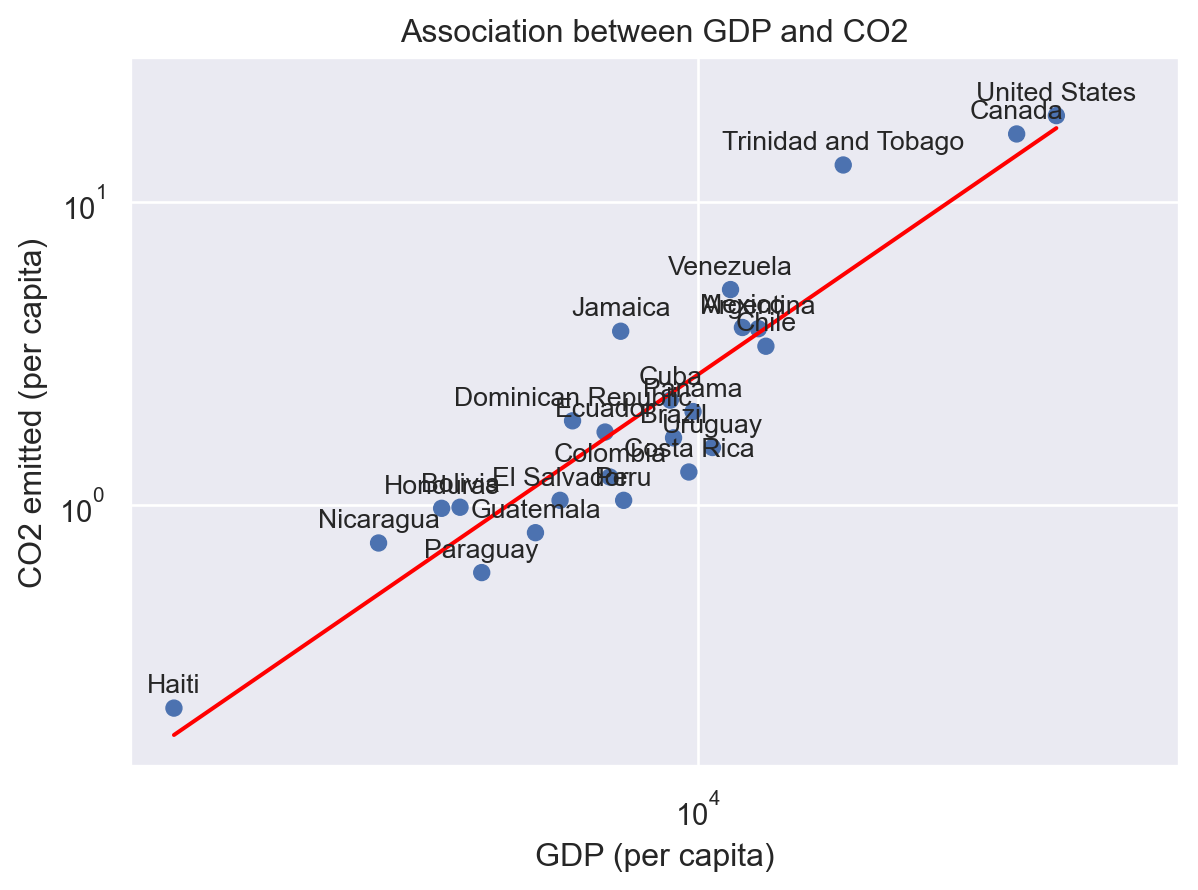

In [51]:
import seaborn.objects as so

(
    so.Plot(gapminder_co2,
            x='gdpPercap',
            y='emissions_percap',
            text='country')
    .add(so.Dot())
    .add(so.Line(color='red'), so.PolyFit(order=1), text=None)
    .add(so.Text(valign='bottom', fontsize=10))
    .scale(x='log', y='log')
    .label(x="GDP (per capita)",
           y="CO2 emitted (per capita)",
           title="Association between GDP and CO2")
    .limit(x=(None,70_000), y=(None, 30)) # Changes upper limits of axes
)

In [52]:
( 
    pd.read_csv('data/gapminder_co2.csv')
    .filter(['region', 'emissions_total', 'pop'])
    .groupby('region')
    .sum()
    .assign(emissions_perc=lambda df: df['emissions_total'] / np.sum(df['emissions_total']))
)

,emissions_total,pop,emissions_perc
region,,,
north,6656036.805,447173470.0,0.882135
south,889331.721,451697714.0,0.117865


In [53]:
# Map plots

In [54]:
gapminder_1997 = pd.read_csv("data/gapminder_1997.csv")

In [57]:
import plotly.express as px

fig = (
    gapminder_1997
    .replace({
        'country' : {
            'United States' : 'United States of America',
            'United Kingdom' : 'United Kingdom of Great Britain and Northern Ireland',
        }
    })
    .merge(pd.read_csv('data/country-iso.csv')
          .rename(columns={'name' : 'country'}),
           on='country', how='inner')
    .pipe(px.choropleth, 
          locations='alpha-3',
          color='lifeExp',
          hover_name='country',
          hover_data=['lifeExp', 'pop'])
)

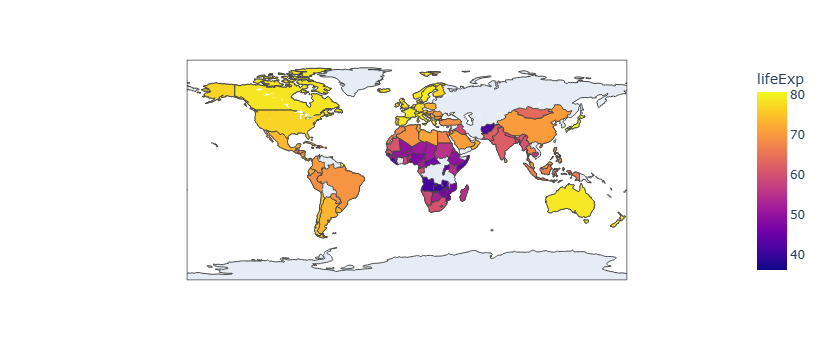

In [58]:
fig